In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy 

In [2]:
# 1.1
m, eta = 1E-2, 0.3
kij = 1E5
cij = 2 * eta * np.sqrt(kij * m)
pts = np.array([[0, 0], [1, 1], [2, 2],[3, 3]])
# length of the spring, cos(theta), sin(theta)
Kij = np.zeros((len(pts)*2, len(pts)*2))
Cij = np.zeros((len(pts)*2, len(pts)*2))
Mij = np.eye(len(pts)*2) * m
# Mij = np.zeros((len(pts)*2, len(pts)*2))
for n in range(len(pts)-1):
    l = np.linalg.norm(pts[n+1] - pts[n])
    c = (pts[n+1, 0] - pts[n, 0]) / l
    s = (pts[n+1, 1] - pts[n, 1]) / l
    print(f"l_{n} = {l:.2f}, c_{n} = {c:.2f}, s_{n} = {s:.2f}")
#
    Kij[2*n:(2*n+4), 2*n:(2*n+4)] += np.array([[c**2, c * s, -c**2, -c * s],
                                                [c * s, s**2, -c * s, -s**2],
                                                [-c**2, -c * s, c**2, c * s],
                                                [-c * s, -s**2, c * s, s**2]]) * kij
    Cij[2*n:(2*n+4), 2*n:(2*n+4)] += np.array([[c**2, c * s, -c**2, -c * s],
                                                [c * s, s**2, -c * s, -s**2],
                                                [-c**2, -c * s, c**2, c * s],
                                                [-c * s, -s**2, c * s, s**2]]) * cij
    # Mij[2*n:(2*n+4), 2*n:(2*n+4)] = np.array([[1, 0, 0, 0],
    #                                             [0, 1, 0, 0],
    #                                             [0, 0, 1, 0],
    #                                             [0, 0, 0, 1]]) * m
# 
display(pd.DataFrame(Kij))
display(pd.DataFrame(Cij))
display(pd.DataFrame(Mij))

l_0 = 1.41, c_0 = 0.71, s_0 = 0.71
l_1 = 1.41, c_1 = 0.71, s_1 = 0.71
l_2 = 1.41, c_2 = 0.71, s_2 = 0.71


,0,1,2,3,4,5,6,7
0,50000.0,50000.0,-50000.0,-50000.0,0.0,0.0,0.0,0.0
1,50000.0,50000.0,-50000.0,-50000.0,0.0,0.0,0.0,0.0
2,-50000.0,-50000.0,100000.0,100000.0,-50000.0,-50000.0,0.0,0.0
3,-50000.0,-50000.0,100000.0,100000.0,-50000.0,-50000.0,0.0,0.0
4,0.0,0.0,-50000.0,-50000.0,100000.0,100000.0,-50000.0,-50000.0
5,0.0,0.0,-50000.0,-50000.0,100000.0,100000.0,-50000.0,-50000.0
6,0.0,0.0,0.0,0.0,-50000.0,-50000.0,50000.0,50000.0
7,0.0,0.0,0.0,0.0,-50000.0,-50000.0,50000.0,50000.0


,0,1,2,3,4,5,6,7
0,9.486833,9.486833,-9.486833,-9.486833,0.000000,0.000000,0.000000,0.000000
1,9.486833,9.486833,-9.486833,-9.486833,0.000000,0.000000,0.000000,0.000000
2,-9.486833,-9.486833,18.973666,18.973666,-9.486833,-9.486833,0.000000,0.000000
3,-9.486833,-9.486833,18.973666,18.973666,-9.486833,-9.486833,0.000000,0.000000
4,0.000000,0.000000,-9.486833,-9.486833,18.973666,18.973666,-9.486833,-9.486833
5,0.000000,0.000000,-9.486833,-9.486833,18.973666,18.973666,-9.486833,-9.486833
6,0.000000,0.000000,0.000000,0.000000,-9.486833,-9.486833,9.486833,9.486833
7,0.000000,0.000000,0.000000,0.000000,-9.486833,-9.486833,9.486833,9.486833


,0,1,2,3,4,5,6,7
0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01


In [3]:
Kff = Kij[2:][:, 2:]
Cff = Cij[2:][:, 2:]
Mff = Mij[2:][:, 2:]
print(Kff)
print(Cff)
print(Mff)

[[100000. 100000. -50000. -50000.      0.      0.]
 [100000. 100000. -50000. -50000.      0.      0.]
 [-50000. -50000. 100000. 100000. -50000. -50000.]
 [-50000. -50000. 100000. 100000. -50000. -50000.]
 [     0.      0. -50000. -50000.  50000.  50000.]
 [     0.      0. -50000. -50000.  50000.  50000.]]
[[18.97366596 18.97366596 -9.48683298 -9.48683298  0.          0.        ]
 [18.97366596 18.97366596 -9.48683298 -9.48683298  0.          0.        ]
 [-9.48683298 -9.48683298 18.97366596 18.97366596 -9.48683298 -9.48683298]
 [-9.48683298 -9.48683298 18.97366596 18.97366596 -9.48683298 -9.48683298]
 [ 0.          0.         -9.48683298 -9.48683298  9.48683298  9.48683298]
 [ 0.          0.         -9.48683298 -9.48683298  9.48683298  9.48683298]]
[[0.01 0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.   0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.01]]


In [4]:
# y = np.array([[0, 0, np.nan, np.nan, np.nan, np.nan],
#               [0, 0, np.nan, np.nan, np.nan, np.nan]]).flatten()
# print(y)

In [5]:
# fixed_node = (y.reshape(2, -1)[0] == 0)
# print(fixed_node)
# free_node = ~fixed_node
# #
# Kff = Kij[free_node][:, free_node]
# Cff = Cij[free_node][:, free_node]
# Mff = Mij[free_node][:, free_node]
# #
# print(Kff)
# print(Cff)
# print(Mff)


In [6]:
Ft = np.zeros((len(pts)*2-2, ))
Ft[-2:] = 100
print(Ft)

[  0.   0.   0.   0. 100. 100.]


In [7]:
def ode(t, y, K, C, M):
    #
    u = y.reshape(2, -1)[0]
    du = y.reshape(2, -1)[1]
    #
    ddu = np.linalg.solve(M, Ft-np.dot(C, du) - np.dot(K, u))
    
    return np.concatenate([du, ddu])


In [8]:
# 固定点抹去，只能求解力的响应，拼接方式和刚度矩阵一致

In [9]:
from scipy.integrate import solve_ivp
y0 = np.zeros((len(pts)*2*2-4))
sol = solve_ivp(lambda __t, __y: ode(__t, __y, Kff, Cff, Mff), [0, .1], y0=y0, t_eval=np.linspace(0, .1, 1000))

0.0020000001403319453


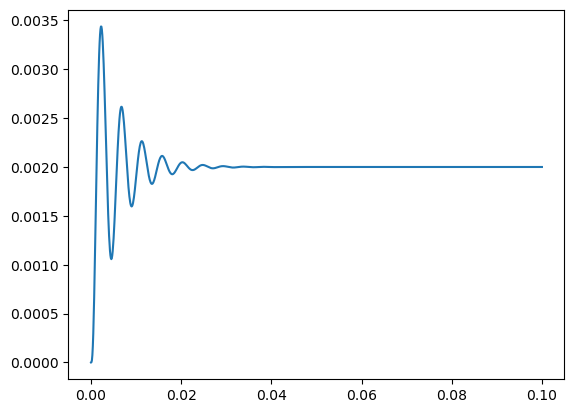

In [12]:
import matplotlib.pyplot as plt

plt.plot(sol.t, sol.y[3])
print(sol.y[3, -1])
# plt.plot(sol.t, sol.y[4])
plt.show()

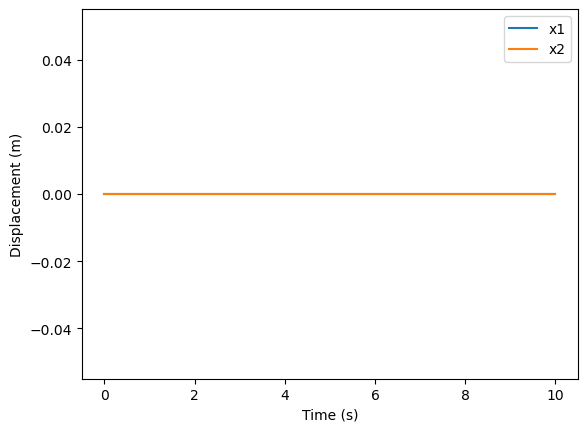

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 

# 定义系统参数
M = np.diag([1, 1])  # 质量矩阵
K = np.diag([100, 100])  # 刚度矩阵
C = np.diag([10, 10])  # 阻尼矩阵
F = np.zeros((2, ))  # 外力向量

# 建立运动方程
A = np.block([[np.zeros((2, 2)), np.eye(2)], [-np.linalg.inv(M) @ K, -np.linalg.inv(M) @ C]])
B = np.block([[np.zeros((2, 2))], [np.linalg.inv(M)]])

# 求解运动方程
t = np.linspace(0, 10, 1000)  # 时间范围
x0 = np.zeros((4, ))  # 初始条件
X= scipy.integrate.odeint(lambda x, t: np.dot(A, x) + np.dot(B, F), x0, t, rtol=1e-6, atol=1e-8)

# 分析系统动力学
plt.plot(t, X[:, 0], label='x1')
plt.plot(t, X[:, 1], label='x2')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.show()